In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv('/Users/anushkaaprabhat/Desktop/Datasets/Electric_Vehicle_Population_Data.csv')

In [2]:
df.head(5)
#This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are 
#currently registered through Washington State Department of Licensing (DOL).

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10


In [3]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,194223.000000,194232.000000,194230.000000,194230.000000,193800.000000,1.942320e+05,1.942230e+05
mean,98175.800678,2020.781807,54.835458,978.730732,29.009954,2.248923e+08,5.297532e+10
std,2435.345863,2.999041,89.614355,7988.719011,14.901335,7.357830e+07,1.607770e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.872251e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.339402e+08,5.303303e+10
75%,98372.000000,2023.000000,68.000000,0.000000,42.000000,2.601159e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [4]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 9
City                                                   9
State                                                  0
Postal Code                                            9
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         2
Base MSRP                                              2
Legislative District                                 432
DOL Vehicle ID                                         0
Vehicle Location                                      13
Electric Utility                                       9
2020 Census Tract                                      9
dtype: int64

# Distribution of Vehicle Types

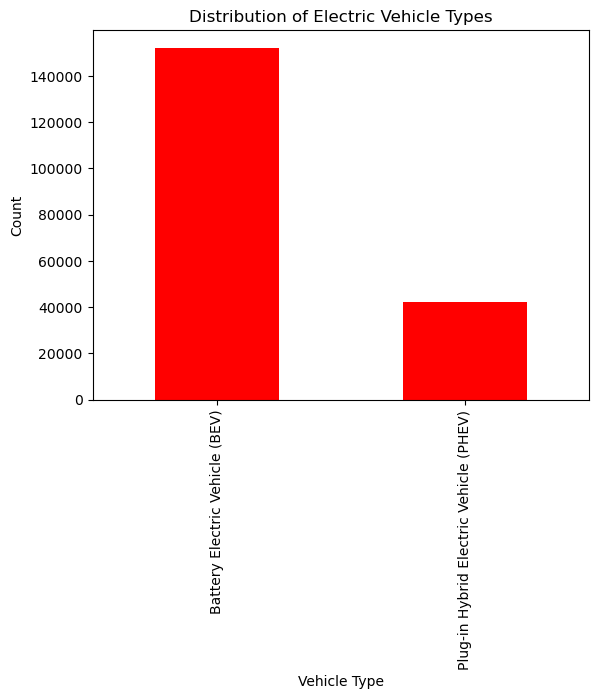

In [44]:
import matplotlib.pyplot as plt

vehicle_type_counts = df['Electric Vehicle Type'].value_counts()

vehicle_type_counts.plot(kind='bar',color = "red")

plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

# Distribution of Vehicle making

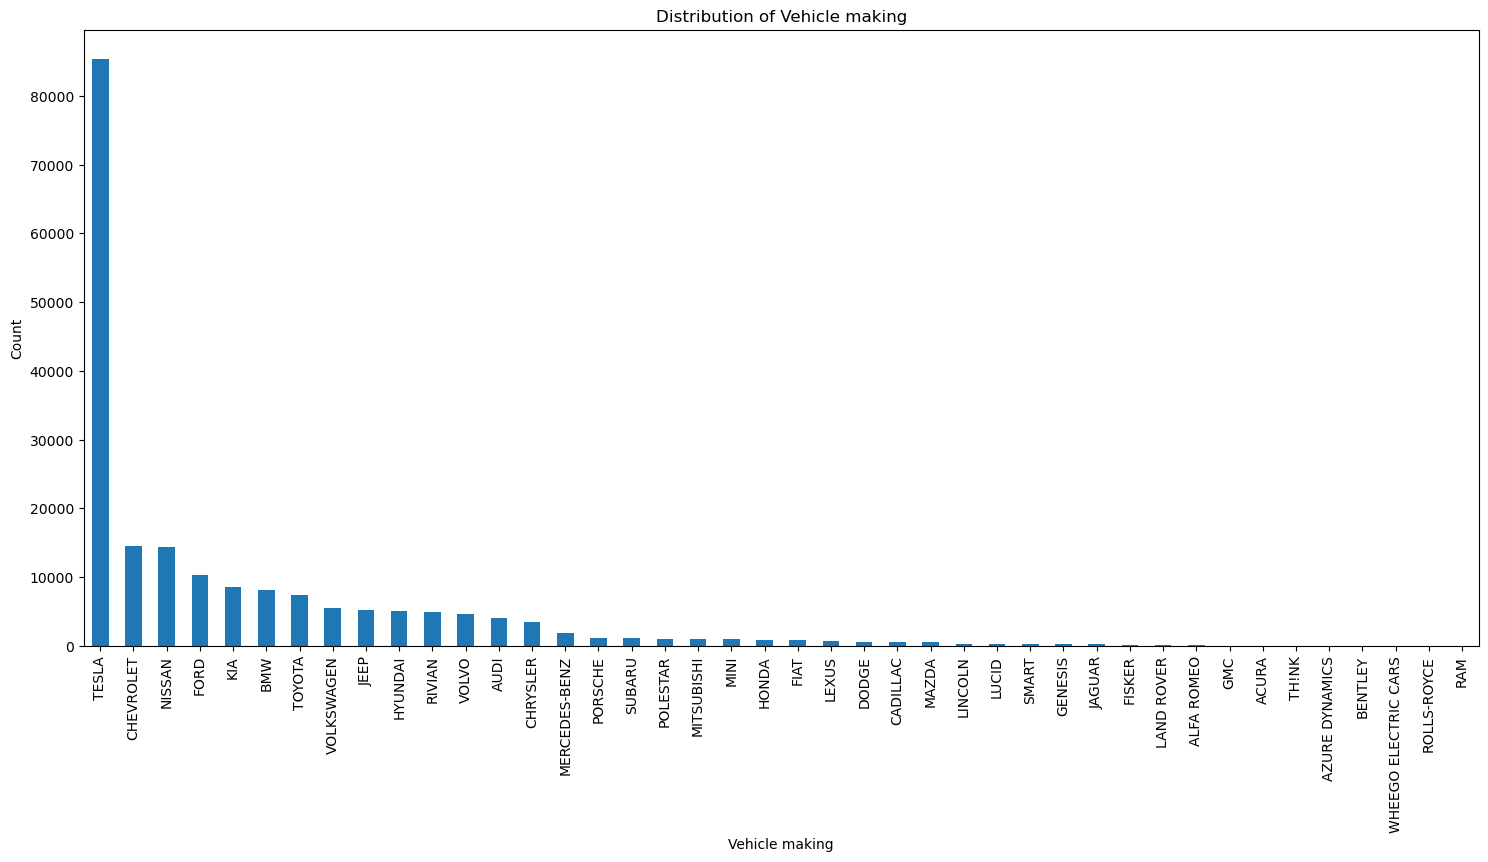

In [42]:
vehicle_making = df['Make'].value_counts()
plt.figure(figsize=(18, 8))
vehicle_making.plot(kind='bar')


plt.title('Distribution of Vehicle making')
plt.xlabel('Vehicle making')
plt.ylabel('Count')

plt.show()

# Range by Vehicle

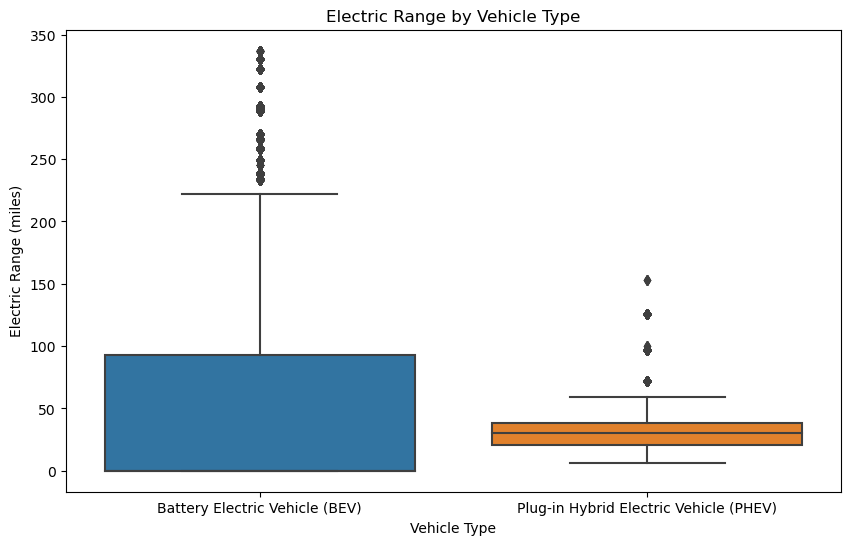

In [18]:
import seaborn as sns


df['Electric Vehicle Type'] = pd.Categorical(df['Electric Vehicle Type'], 
                                                  categories=['Battery Electric Vehicle (BEV)', 
                                                              'Plug-in Hybrid Electric Vehicle (PHEV)'],
                                                  ordered=True)
#This converts the Electric Vehicle Type column into a categorical variable with an explicit order.
#It ensures that BEV and PHEV are the only recognized categories and orders them as specified.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)



#Customization and Display
plt.title('Electric Range by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Electric Range (miles)')

plt.show()

# Top 10 Cities by Vehicle Registrations

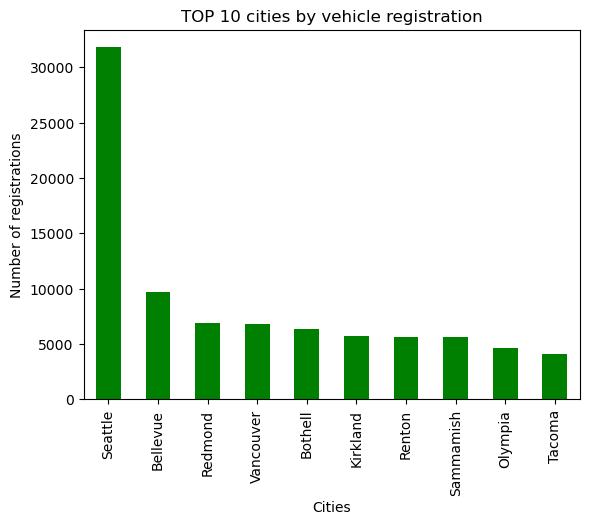

In [27]:
top_cities = df['City'].value_counts().head(10)

top_cities.plot(kind='bar', color= 'green')


plt.title('TOP 10 cities by vehicle registration')
plt.xlabel('Cities')
plt.ylabel('Number of registrations')

plt.show()

# Vehicles by Model Year

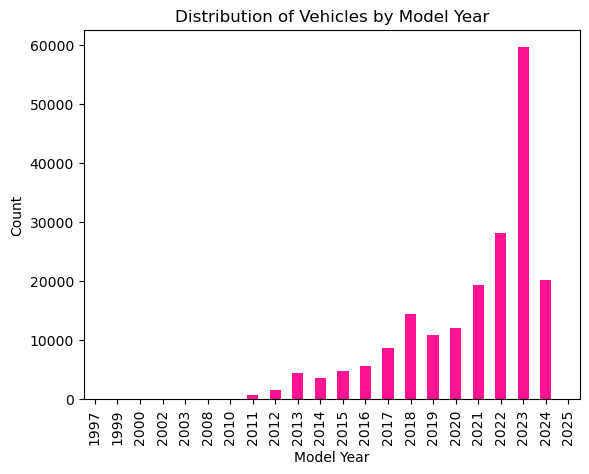

In [34]:
df['Model Year'].value_counts().sort_index().plot(kind='bar', color= 'deeppink')


plt.title('Distribution of Vehicles by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()


# Range by Manufacturer

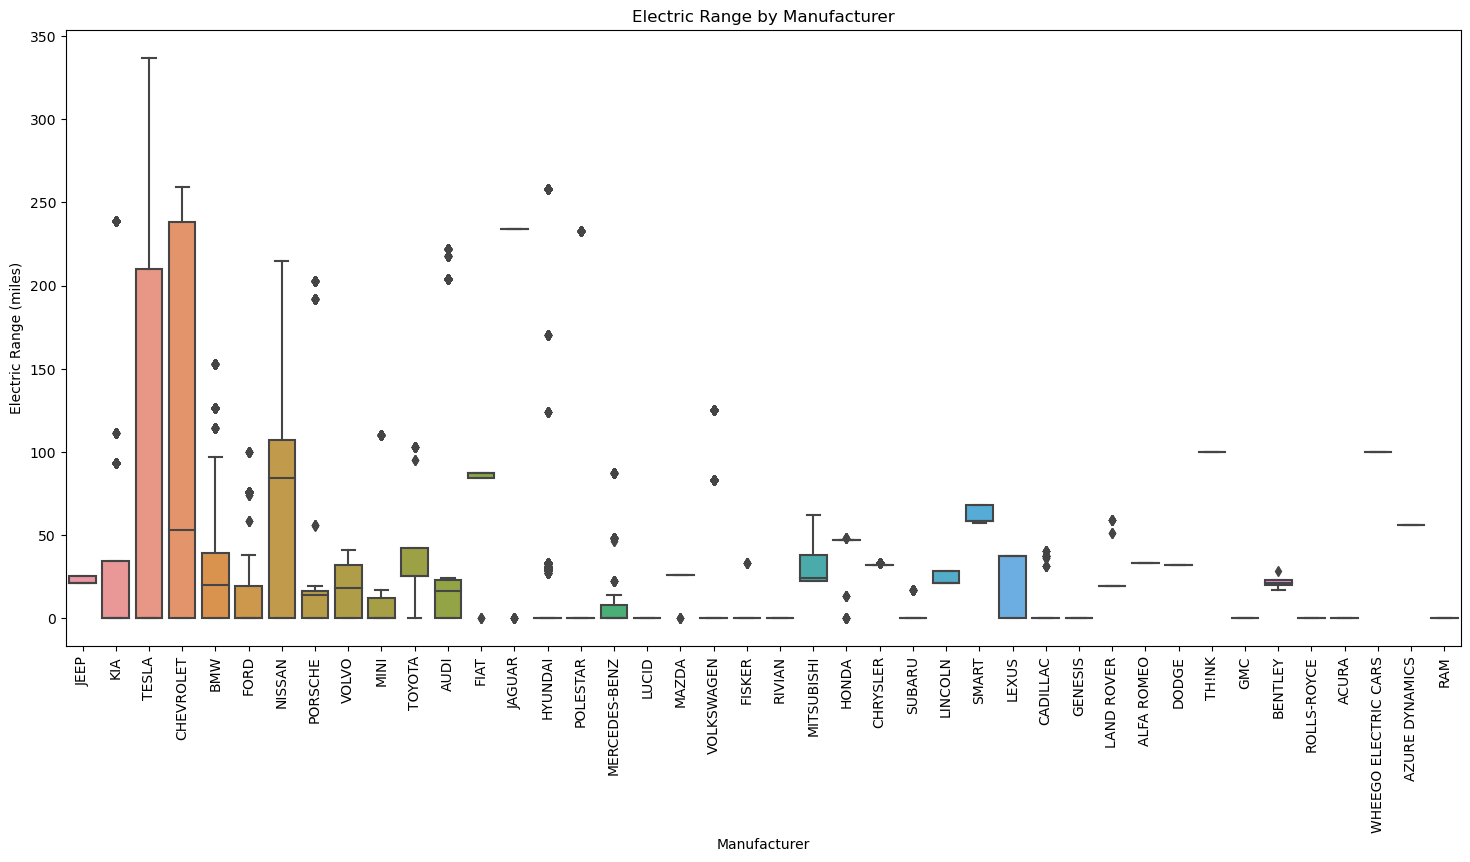

In [40]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Make', y='Electric Range', data=df)

plt.title('Electric Range by Manufacturer')
plt.xticks(rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Electric Range (miles)')

plt.show()


# BEV vs. PHEV

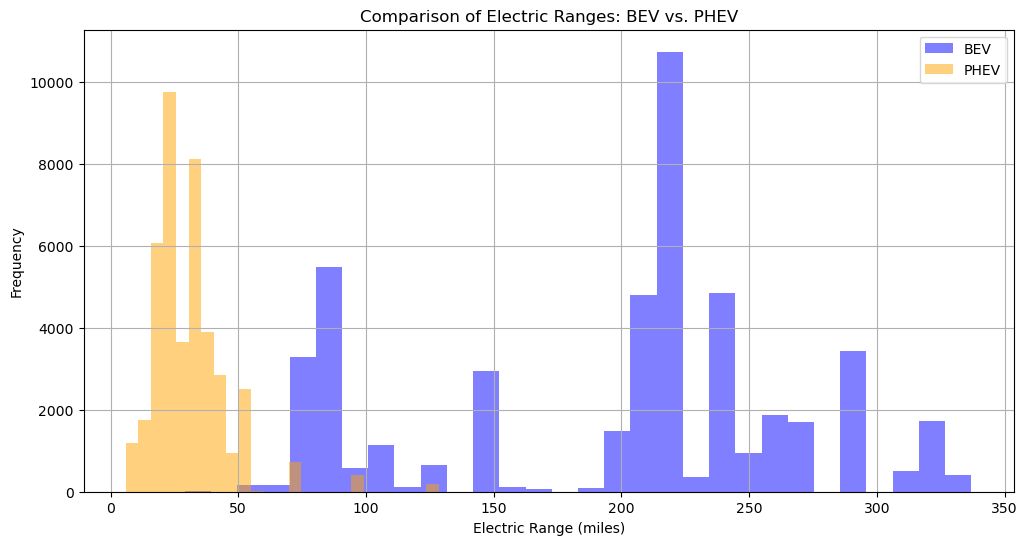

In [41]:
filtered_df = df[df['Electric Range'] > 0]
#This line filters the original DataFrame df to include only rows where the Electric Range is greater than 0. 
#This ensures that only vehicles with a positive electric range are considered in the analysis.

bev_df = filtered_df[filtered_df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
phev_df = filtered_df[filtered_df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']
#bev_df contains only the rows where the vehicle type is "Battery Electric Vehicle (BEV)" from the filtered dataset.
#phev_df contains only the rows where the vehicle type is "Plug-in Hybrid Electric Vehicle (PHEV)" from the filtered dataset.


plt.figure(figsize=(12, 6))

plt.hist(bev_df['Electric Range'], bins=30, alpha=0.5, label='BEV', color='blue')
plt.hist(phev_df['Electric Range'], bins=30, alpha=0.5, label='PHEV', color='orange')


plt.title('Comparison of Electric Ranges: BEV vs. PHEV')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()